<a href="https://colab.research.google.com/github/hufsaim/T10306201/blob/master/advanced/Lab01_LPF_in_freq.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import scipy.io as sio
import matplotlib.pyplot as plt
import numpy as np

In [2]:
d = sio.loadmat('kspace_2d_fft_5echo.mat')
kspace = d['kspace']
te = d['te']

print(kspace.shape) # x, y, z, t
print(te) # sec

(320, 320, 10, 5)
[[0.009]
 [0.018]
 [0.027]
 [0.036]
 [0.045]]


In [3]:
F = kspace[:,:,0,4]
F.shape

(320, 320)

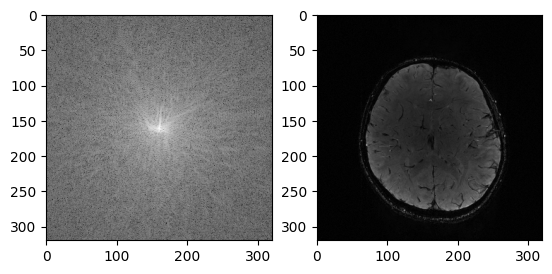

In [4]:
img = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(F)))
plt.subplot(121)
plt.imshow(np.log(np.abs(F)),cmap='gray')
plt.subplot(122)
plt.imshow(np.abs(img),cmap='gray')
plt.show()

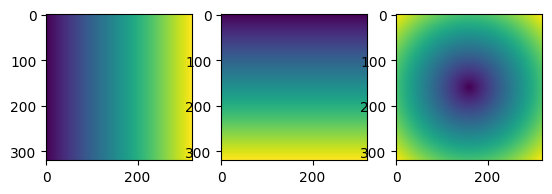

In [5]:
U = np.linspace(0,319,320)
V = np.linspace(0,319,320)
u,v = np.meshgrid(U,V)
D = np.sqrt((u-160)**2+(v-160)**2)
plt.subplot(131)
plt.imshow(u)
plt.subplot(132)
plt.imshow(v)
plt.subplot(133)
plt.imshow(D)
plt.show()

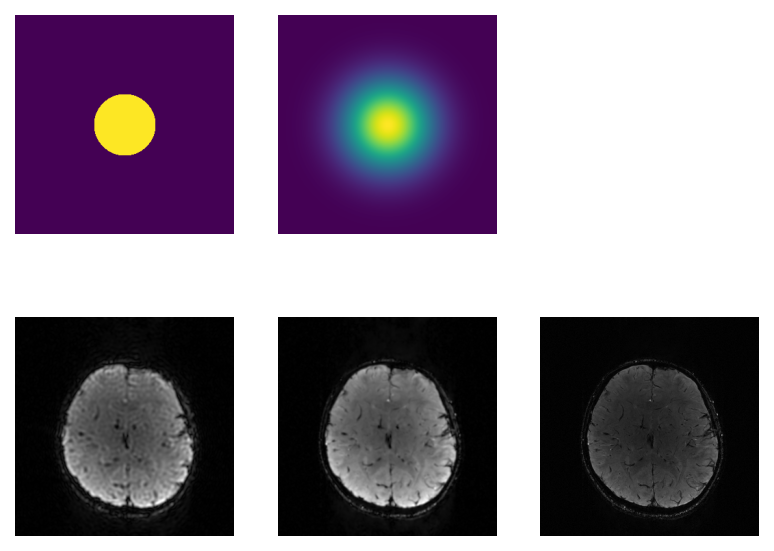

In [6]:
plt.figure(dpi=150)

D_0 = 45

H_ideal = np.zeros(D.shape)
H_ideal[D<D_0] = 1
plt.subplot(231)
plt.imshow(H_ideal)
plt.axis('off')
img_ideal = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(F*H_ideal)))
plt.subplot(234)
plt.imshow(np.abs(img_ideal),cmap='gray')
plt.axis('off')

H_gaussian = np.exp(-(D**2)/(2*(D_0**2)))
plt.subplot(232)
plt.imshow(H_gaussian)
plt.axis('off')

img_gaussian = np.fft.fftshift(np.fft.fftn(np.fft.fftshift(F*H_gaussian)))
plt.subplot(235)
plt.imshow(np.abs(img_gaussian),cmap='gray')
plt.axis('off')


plt.subplot(236)
plt.imshow(np.abs(img),cmap='gray')
plt.axis('off')

plt.show()